<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ3 *Random Forest*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de *Random Forest*.

## 1. Instalar los packages necesarios

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
set.seed(17)

Loading required package: rpart

Warning message:
“package ‘rpart’ was built under R version 3.5.2”
Loading required package: caret

Warning message:
“package ‘caret’ was built under R version 3.5.2”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.5.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




## 2. Carga de los datos

In [2]:
wdbc=read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
  sep=",", header=FALSE)

dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

## 3. Creación del modelo

### Parámetros de creación del modelo

In [3]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)

# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"

## 4. Creamos un primer modelo de árbol

In [4]:
model.cart<-train(V2~.,data=dataset,method="rpart", metric=metric,trControl=control)

### Matriz de confusión

In [5]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 58.6  4.2
         M  4.2 33.0
                            
 Accuracy (average) : 0.9162


###  Mostramos todas sus características.

CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.004716981  0.9162129  0.8206120
  0.049528302  0.9138118  0.8156747
  0.792452830  0.7526687  0.3742095

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004716981.


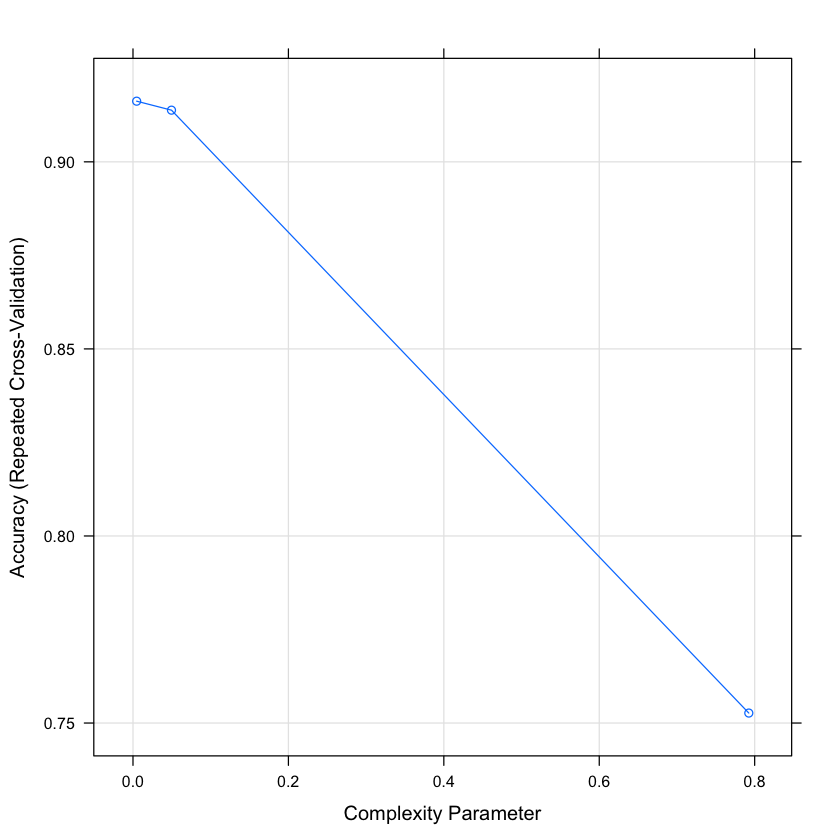

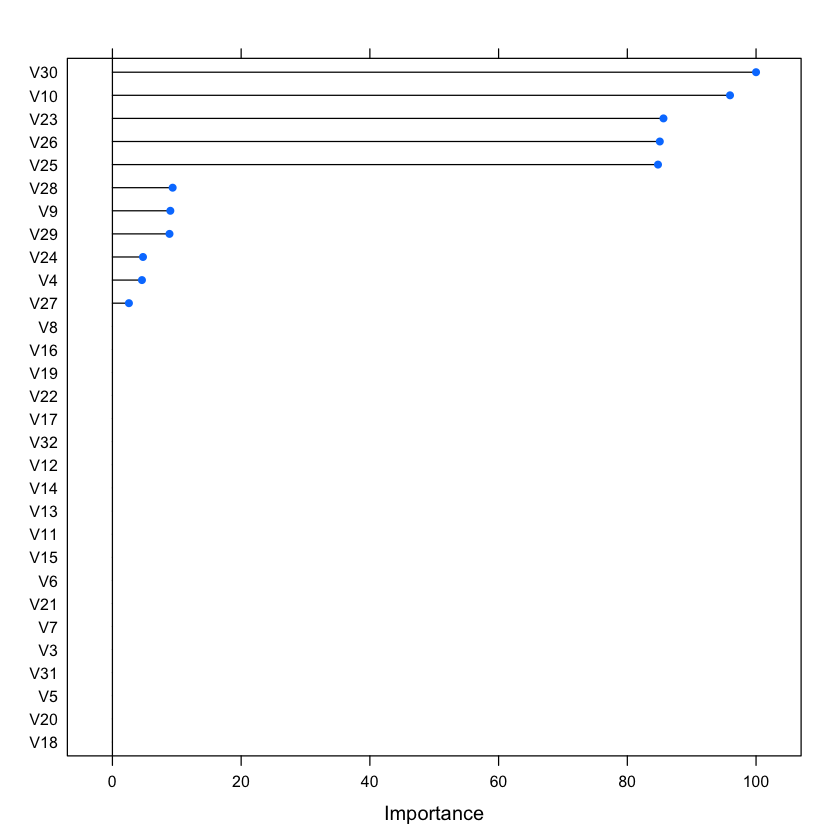

In [6]:
print(model.cart)
plot(model.cart)
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

## 5. Creación de un árbol con el método Random Forest

In [7]:
 model.rf <- train(V2~., data=dataset, method="rf",metric=metric, trControl=control)

### Matriz de confusión

In [8]:
confusionMatrix(model.rf)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 61.5  2.3
         M  1.3 34.9
                            
 Accuracy (average) : 0.9637


###  Mostramos todas sus características.

Random Forest 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 512, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9601576  0.9138413
  16    0.9636465  0.9213230
  30    0.9606912  0.9148858

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 16.


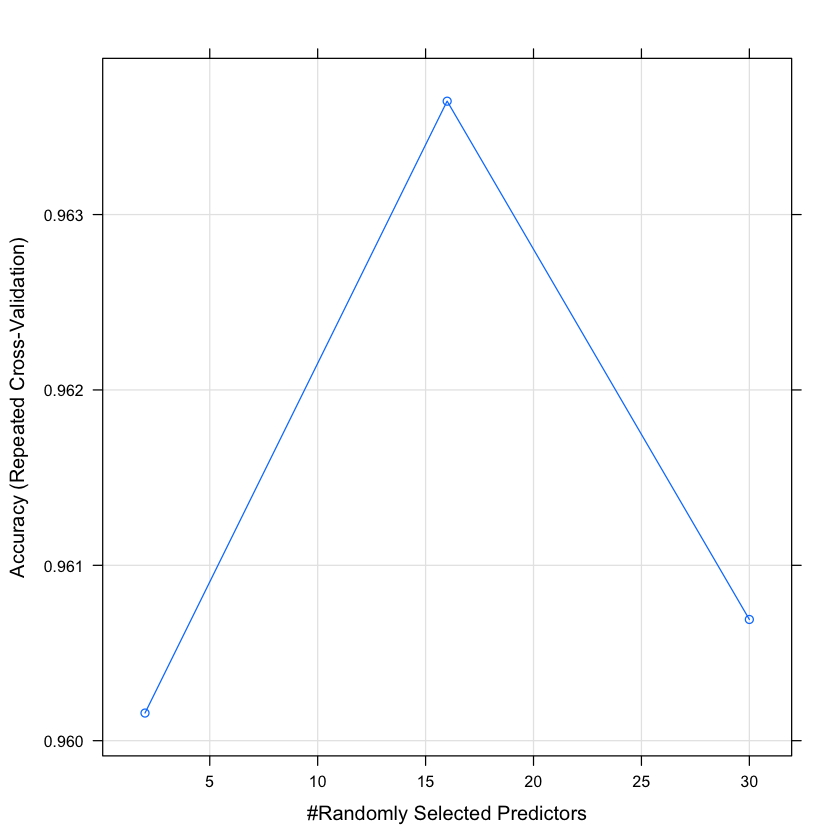

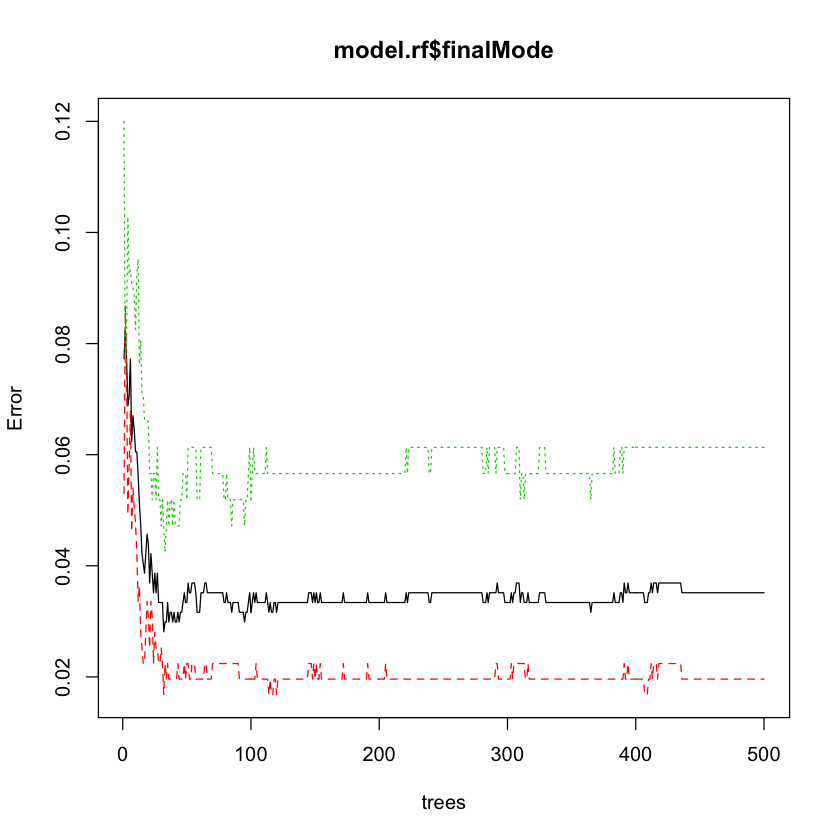

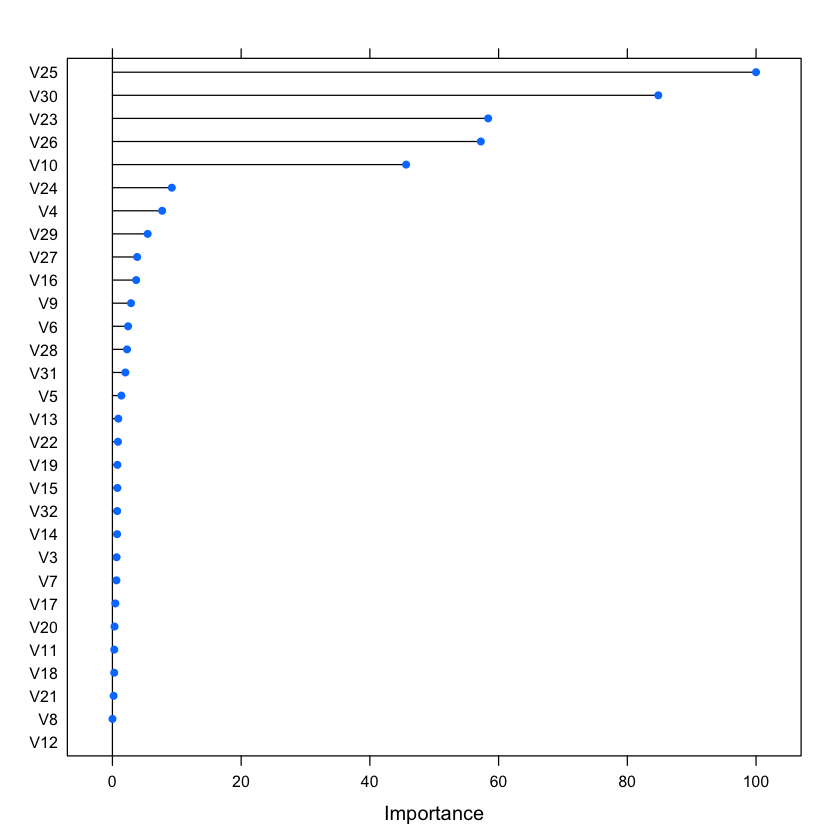

In [9]:
print(model.rf)
plot(model.rf)
plot(model.rf$finalMode)
ctreeVarImp = varImp(model.rf)
plot(ctreeVarImp)

## 6. Sumarizamos y comparamos los datos de ambos modelos


Call:
summary.resamples(object = rf_results)

Models: rf, cart 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf   0.9122807 0.9473684 0.9649123 0.9636465 0.9824561 1.0000000    0
cart 0.8392857 0.8811090 0.9130369 0.9162129 0.9471335 0.9824561    0

Kappa 
          Min.   1st Qu.    Median     Mean   3rd Qu.      Max. NA's
rf   0.8057260 0.8863326 0.9238400 0.921323 0.9622642 1.0000000    0
cart 0.6538462 0.7406943 0.8186858 0.820612 0.8865372 0.9626719    0


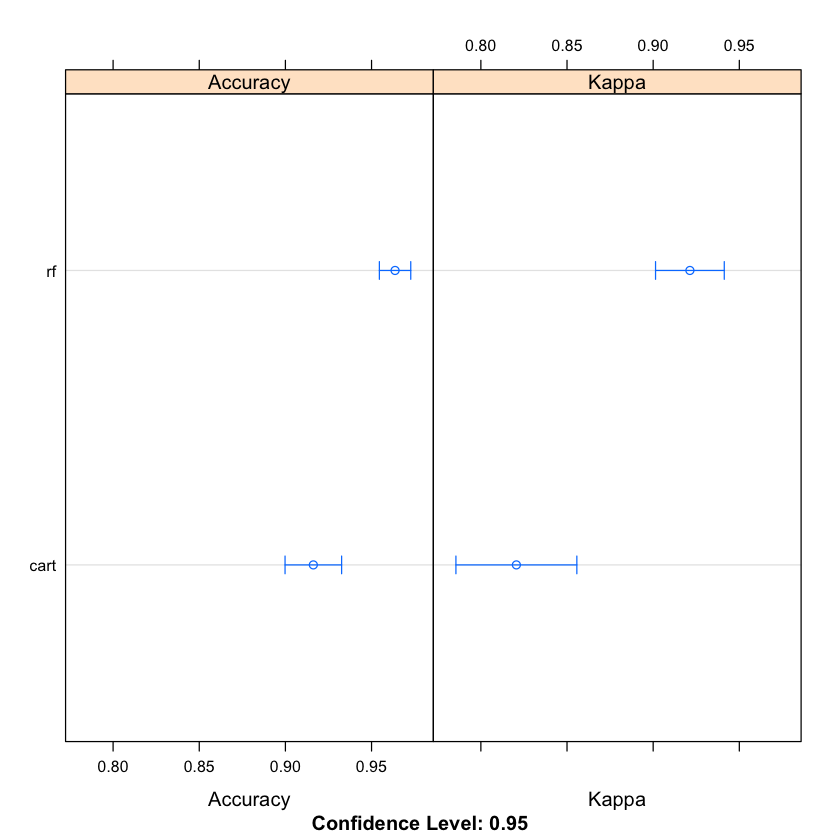

In [10]:
rf_results <- resamples(list(rf=model.rf, cart=model.cart))
summary(rf_results)
dotplot(rf_results)